In [1]:
import pandas as pd 
import numpy as np 
from statistics import mean
from fractions import Fraction as fr
from sklearn.decomposition import PCA 
 
from sklearn.preprocessing import StandardScaler 
 
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Introduction  
The project is talking about the glass identification. Glass classification analysis is used to study the motives of crimes at crime scenes,but in most cases only a small number of elements can be measured.The following operations are to analyze the relationship between these elements. 
Mainly measure the composition of individual glass shards, classify and analyze them, provide data sets, then classify these data, remove useless data, and finally analyze useful data.


In [3]:
df_data = pd.read_excel(r'C:\Users\xitin\ma544\glass.xlsx')
print(df_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Column1  214 non-null    int64  
 1   RI       214 non-null    float64
 2   Na       214 non-null    float64
 3   Mg       214 non-null    float64
 4   AL       214 non-null    float64
 5   Si       214 non-null    float64
 6   K        214 non-null    float64
 7   Ca       214 non-null    float64
 8   Ba       214 non-null    float64
 9   Fe       214 non-null    float64
 10  Class    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
None


In [4]:
print(df_data.shape)

(214, 11)


In [5]:
print(df_data.head(15))

    Column1       RI     Na    Mg    AL     Si     K    Ca   Ba    Fe  Class
0         1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00      1
1         2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00      1
2         3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00      1
3         4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00      1
4         5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00      1
5         6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26      1
6         7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00      1
7         8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00      1
8         9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00      1
9        10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11      1
10       11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24      1
11       12  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00      1

C:\Users\xitin\AppData\Local\Temp\ipykernel_19244\2936880355.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

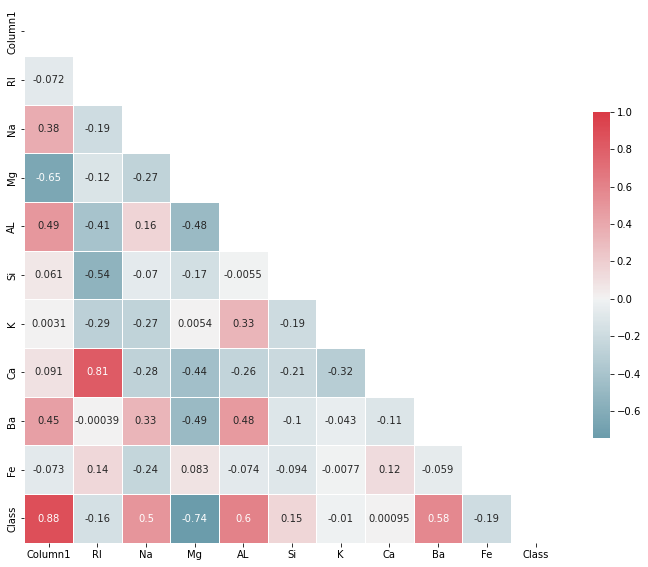

In [6]:
df_corr =df_data.corr() 
corr =df_corr.values 
 
mask = np.zeros_like(corr, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
 
# Set up the matplotlib figure 
f, ax = plt.subplots(figsize=(12, 12)) 
 
# Generate a custom diverging colormap 
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
 
# Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=1.0,annot=True, center=0,
            square=True, linewidths=1.0, cbar_kws={"shrink": .5}) 

In [7]:
df_data.duplicated().sum()

0

In [8]:
df_data.isnull().sum()

Column1    0
RI         0
Na         0
Mg         0
AL         0
Si         0
K          0
Ca         0
Ba         0
Fe         0
Class      0
dtype: int64

In [9]:
table = df_data.head(15)
print(table)

    Column1       RI     Na    Mg    AL     Si     K    Ca   Ba    Fe  Class
0         1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00      1
1         2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00      1
2         3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00      1
3         4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00      1
4         5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00      1
5         6  1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26      1
6         7  1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00      1
7         8  1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00      1
8         9  1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00      1
9        10  1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11      1
10       11  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24      1
11       12  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00      1

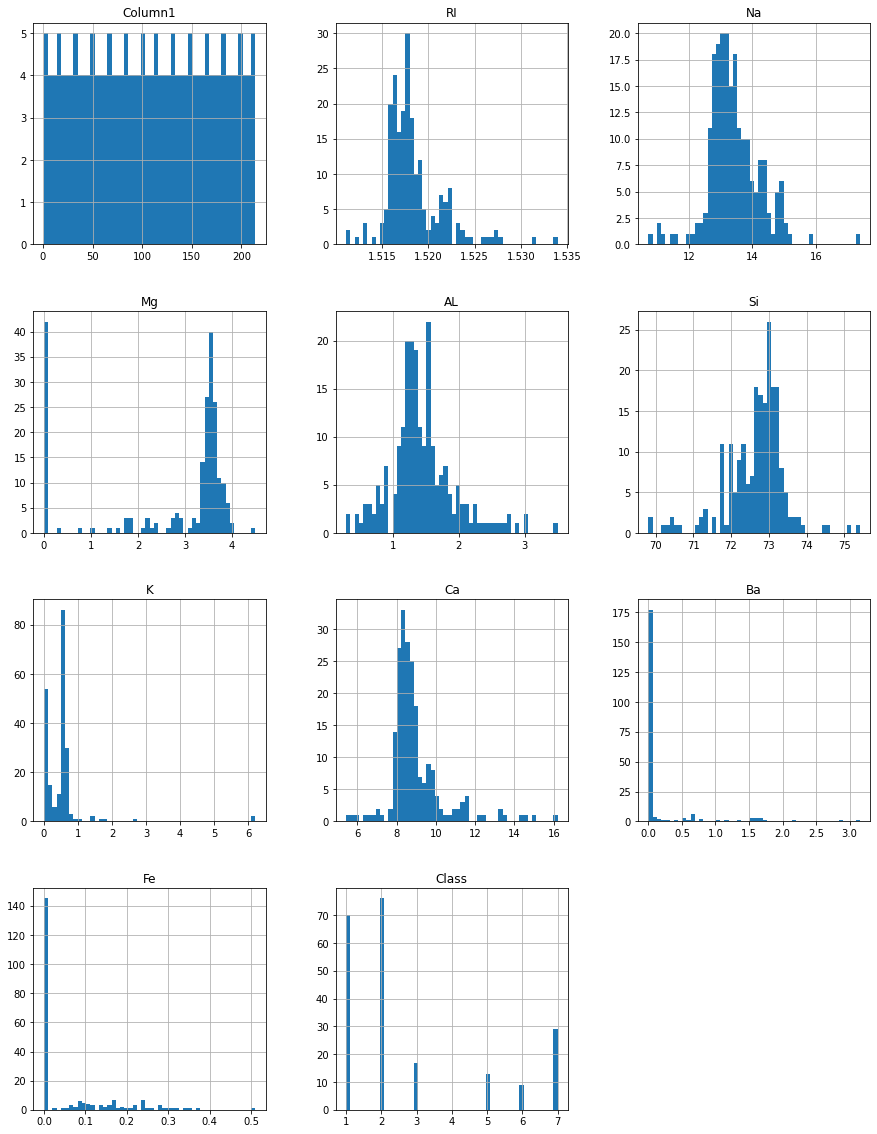

In [10]:
df_data.hist(figsize=(15,20),bins = 50,xlabelsize=10,ylabelsize =10)
plt.savefig('the distribution for each variable.jpg', dpi=200)
plt.show()

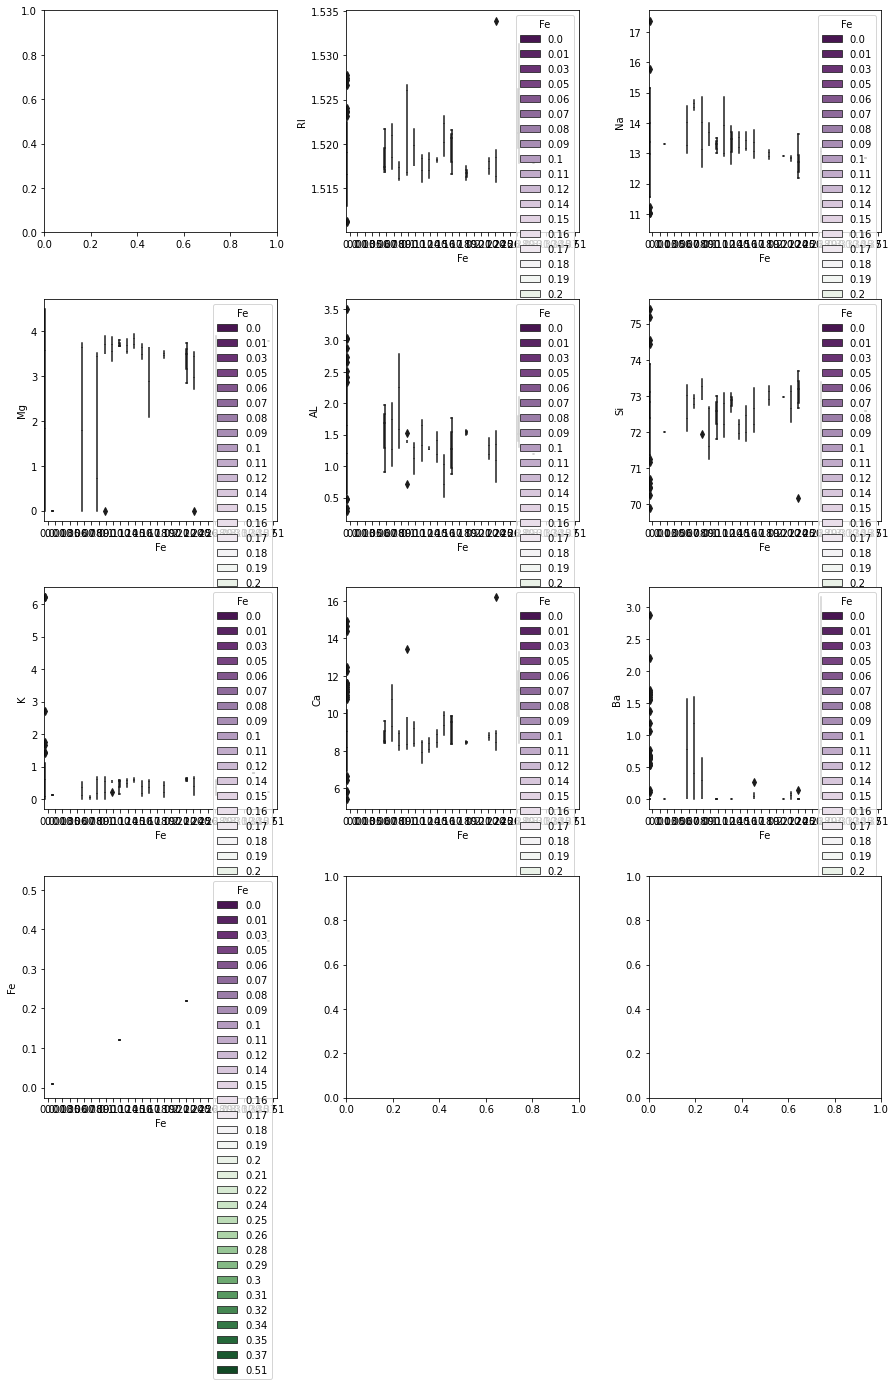

In [11]:
fig,axes = plt.subplots(4,3,figsize=(15,20))
plt.subplots_adjust(wspace = 0.3,hspace=0.3)
sns.boxplot(x="Fe", y="RI", hue="Fe", data=df_data, palette="PRGn",ax = axes[0,1])
sns.boxplot(x="Fe", y="Na", hue="Fe", data=df_data, palette="PRGn",ax = axes[0,2])
sns.boxplot(x="Fe", y="Mg", hue="Fe", data=df_data, palette="PRGn",ax = axes[1,0])
sns.boxplot(x="Fe", y="AL", hue="Fe", data=df_data, palette="PRGn",ax = axes[1,1])
sns.boxplot(x="Fe", y="Si", hue="Fe", data=df_data, palette="PRGn",ax = axes[1,2])
sns.boxplot(x="Fe", y="K", hue="Fe", data=df_data, palette="PRGn",ax = axes[2,0])
sns.boxplot(x="Fe", y="Ca", hue="Fe", data=df_data, palette="PRGn",ax = axes[2,1])
sns.boxplot(x="Fe", y="Ba", hue="Fe", data=df_data, palette="PRGn",ax = axes[2,2])
sns.boxplot(x="Fe", y="Fe", hue="Fe", data=df_data, palette="PRGn",ax = axes[3,0])

plt.savefig('distribution boxplot for each variable.jpg', dpi=200)

In [12]:
df_data.corr()

,Column1,RI,Na,Mg,AL,Si,K,Ca,Ba,Fe,Class
Column1,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
AL,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


In [13]:
df_data.corr()["Fe"]

Column1   -0.072794
RI         0.143010
Na        -0.241346
Mg         0.083060
AL        -0.074402
Si        -0.094201
K         -0.007719
Ca         0.124968
Ba        -0.058692
Fe         1.000000
Class     -0.188278
Name: Fe, dtype: float64

In [14]:
df_data.groupby(['Fe']).size()

Fe
0.00    144
0.01      1
0.03      1
0.05      1
0.06      1
0.07      3
0.08      2
0.09      6
0.10      5
0.11      4
0.12      3
0.14      3
0.15      2
0.16      3
0.17      7
0.18      1
0.19      2
0.20      1
0.21      1
0.22      3
0.24      7
0.25      1
0.26      1
0.28      3
0.29      1
0.30      1
0.31      1
0.32      1
0.34      1
0.35      1
0.37      1
0.51      1
dtype: int64

In [15]:
data_mat = df_data.values
X = data_mat[:,0:9]
Y = data_mat[:,9]
np.set_printoptions(precision=2, suppress=True)
sigmaX = np.std(X,axis=0)
muX = np.mean(X, axis=0)
n = X.shape[0]
print("The size of data set is:", n)
S = np.dot((X - muX).T, (X - muX)) / (n-1)
print('Covariance matrix: \n:')
print(S)

The size of data set is: 214
Covariance matrix: 
:
[[3834.17   -0.01   19.    -58.08   15.15    2.94    0.13    8.     13.89]
 [  -0.01    0.     -0.     -0.     -0.     -0.     -0.      0.     -0.  ]
 [  19.     -0.      0.67   -0.32    0.06   -0.04   -0.14   -0.32    0.13]
 [ -58.08   -0.     -0.32    2.08   -0.35   -0.19    0.01   -0.91   -0.35]
 [  15.15   -0.      0.06   -0.35    0.25   -0.      0.11   -0.18    0.12]
 [   2.94   -0.     -0.04   -0.19   -0.      0.6    -0.1    -0.23   -0.04]
 [   0.13   -0.     -0.14    0.01    0.11   -0.1     0.43   -0.3    -0.01]
 [   8.      0.     -0.32   -0.91   -0.18   -0.23   -0.3     2.03   -0.08]
 [  13.89   -0.      0.13   -0.35    0.12   -0.04   -0.01   -0.08    0.25]]


In [16]:
w, v = np.linalg.eig(S)
print('\nEigenvalues \n%s' %w)
print('\n Explained Ratio: \n%s' %(w/np.sum(w)))


Eigenvalues 
[3835.27    2.58    1.01    0.66    0.63    0.21    0.1     0.      0.  ]

 Explained Ratio: 
[1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
pca = PCA(n_components=6)
pca.fit((X-muX))
Xpca = pca.transform((X-muX))
print ("Explained Variance Ratio")
print (pca.explained_variance_ratio_)

Explained Variance Ratio
[1. 0. 0. 0. 0. 0.]
